In [64]:
import sys
import os
import pandas as pd
import numpy as np
import generative_model
import matplotlib.pyplot as plt
from tqdm import tqdm
import csv
from IPython.core.display import display, HTML
np.random.seed(1)

In [4]:
def process_data(input_data):
    data = input_data.copy()
    data['frame_id'] = pd.to_numeric(data['frame_id'], downcast='integer')
    data['track_id'] = pd.to_numeric(data['track_id'], downcast='integer')

    data['frame_id'] = data['frame_id'] // 10

    data['frame_id'] -= data['frame_id'].min()

    data['node_type'] = 'PEDESTRIAN'
    data['node_id'] = data['track_id'].astype(str)
    data.sort_values('frame_id', inplace=True)

    data['pos_x'] = data['pos_x'] - data['pos_x'].mean()
    data['pos_y'] = data['pos_y'] - data['pos_y'].mean()
    
    # Select only such nodes which have enough data to predict on (8 historical timesteps, 12 future)
    v = data.node_id.value_counts()
    data = data[data.node_id.isin(v.index[v.gt(19)])]
    
    return data

base_path = './raw_data/'
datasets = [
    ['eth/test/biwi_eth.txt'], 
    ['hotel/test/biwi_hotel.txt'], 
    ['univ/test/students001.txt', 'univ/test/students003.txt'],
    ['zara1/test/crowds_zara01.txt'], 
    ['zara2/test/crowds_zara02.txt'],
]

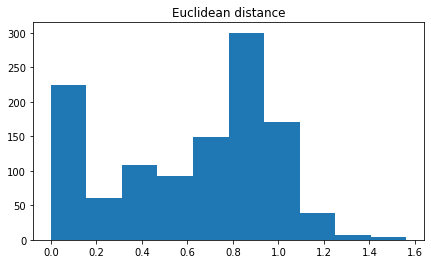

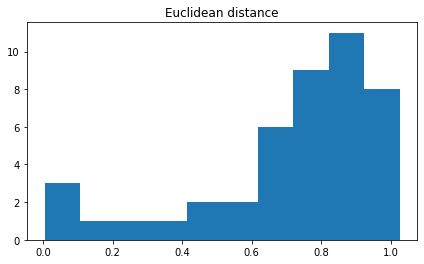

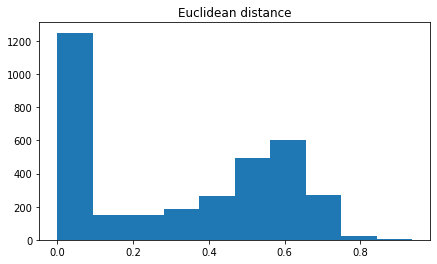

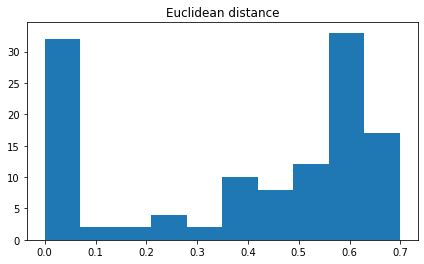

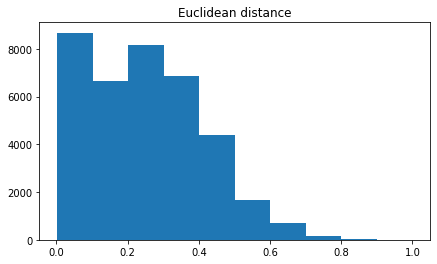

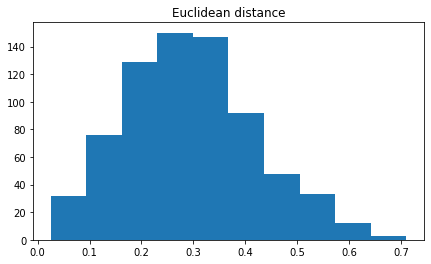

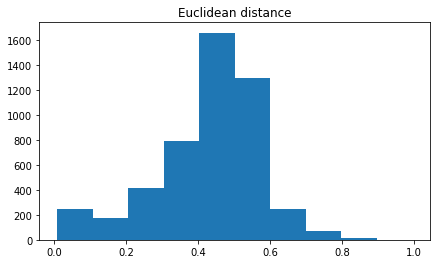

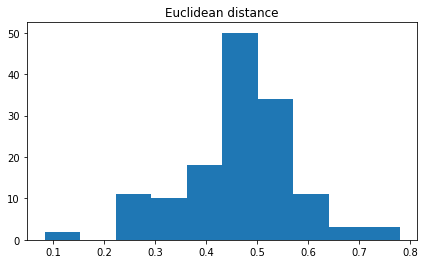

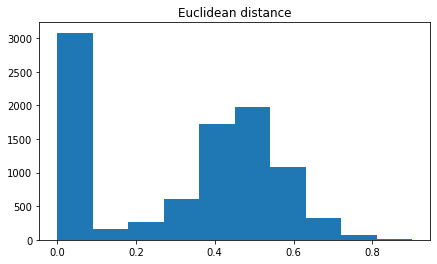

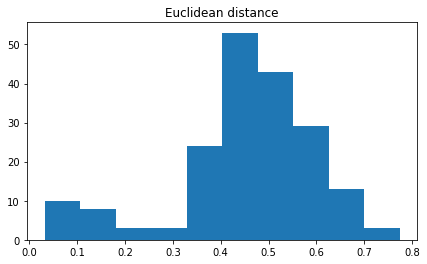

In [118]:
vel_x_dist_over_all_datasets = []
vel_y_dist_over_all_datasets = []

for dataset in datasets:
    dataset_all_vel_x = []
    dataset_all_vel_y = []
    dataset_all_euc_dist = []
    
    dataset_avg_vel_x_per_person = []
    dataset_avg_vel_y_per_person = []
    dataset_all_euc_dist_per_person = []
    
    for scene in dataset:
        
        display(HTML('<h1>Scene: '+ scene +'</h1>'))
        
        data = pd.read_csv(base_path + scene, sep='\t', index_col=False, header=None)
        data.columns = ['frame_id', 'track_id', 'pos_x', 'pos_y']
        data = process_data(data)
        
        nodes = data.node_id.unique()
        for node_id in nodes:
            data_person = data[data.node_id == node_id]
            
            person_x_pos = data_person.pos_x.values
            person_y_pos = data_person.pos_y.values
            
            vel_x = [abs(person_x_pos[i] - person_x_pos[i-1]) for i in range(1, len(person_x_pos))]
            vel_y = [abs(person_y_pos[i] - person_y_pos[i-1]) for i in range(1, len(person_y_pos))]
            
            dataset_all_vel_x += vel_x
            dataset_all_vel_y += vel_y
            
            dataset_avg_vel_x_per_person.append(np.mean(vel_x))
            dataset_avg_vel_y_per_person.append(np.mean(vel_y))
            
            person_euc_dist = []
            for i in range(1, len(person_x_pos)):
                euclidean_distance = np.sqrt((person_x_pos[i] - person_x_pos[i-1])**2 + (person_y_pos[i] - person_y_pos[i-1])**2)
                person_euc_dist.append(euclidean_distance)
            dataset_all_euc_dist += person_euc_dist
            dataset_all_euc_dist_per_person.append(np.mean(person_euc_dist))
            
    vel_x_dist_over_all_datasets += dataset_all_vel_x
    vel_y_dist_over_all_datasets += dataset_all_vel_y
         
 
    display(HTML('<h3>All velocities of all people</h3>'))
    '''plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    plt.hist(dataset_all_vel_x)
    plt.title("Velocity on x axis")
    
    plt.subplot(1, 2, 2)
    plt.hist(dataset_all_vel_y)
    plt.title("Velocity on y axis")
    
    plt.show()'''
    
    
    plt.figure(figsize=(7, 4))
    plt.hist(dataset_all_euc_dist)
    plt.title("Euclidean distance")
    plt.show()
    
    
    display(HTML('<h3>Average velocities per person</h3>'))
    '''plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    plt.hist(dataset_avg_vel_x_per_person)
    plt.title("Velocity on x axis")
    
    plt.subplot(1, 2, 2)
    plt.hist(dataset_avg_vel_y_per_person)
    plt.title("Velocity on y axis")
    
    plt.show()'''
    
    plt.figure(figsize=(7, 4))
    plt.hist(dataset_all_euc_dist_per_person)
    plt.title("Euclidean distance")
    plt.show()

In [74]:
print(len(vel_x_dist_over_all_datasets))

56103


In [79]:
with open('velocity_distributions.npy', 'wb') as f:
    np.save(f, vel_x_dist_over_all_datasets)
    np.save(f, vel_y_dist_over_all_datasets)

In [80]:
with open('velocity_distributions.npy', 'rb') as f:
    x_dist = np.load(f)
    y_dist = np.load(f)

In [78]:
print(len(a))

56103


In [113]:
np.random.choice(vel_x_dist_over_all_datasets)

0.32916743146000016